# License

    Copyright (C) 2015-2016, Andrew W. Steiner

    This is based on the excellent work by Dany Page at
    http://www.astroscu.unam.mx/neutrones/home.html

    This program is free software; you can redistribute it
    and/or modify it under the terms of the GNU General Public License
    as published by the Free Software Foundation; either version 3 of
    the License, or (at your option) any later version.

    This program is distributed in the hope that it will be
    useful, but WITHOUT ANY WARRANTY; without even the implied warranty
    of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
    General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see http://www.gnu.org/licenses/ .

## Perform imports:

In [1]:
import matplotlib.pyplot as plot
import numpy
import urllib.request
try:
    import o2py
except ImportError:
    urllib.request.urlretrieve('http://raw.githubusercontent.com/awsteiner/o2scl'+
         '/master/src/other/o2py.py','o2py.py')
    try:
        import o2py
    except:
        raise ImportError('Could not import o2py, even after download.')
print('Success.')

Success.


## Read crust data

In [2]:
hr=o2py.hdf5_reader()
(nn_tab,loc_type)=hr.h5read_name('inner_nn.o2','inner_nn')
w_nn=nn_tab['data/w']
r_nn=nn_tab['data/r']
w_nn=w_nn[:100000]
r_nn=r_nn[:100000]
(nnuc_tab,loc_type)=hr.h5read_name('inner_nnuc.o2','inner_nnuc')
w_nnuc=nnuc_tab['data/w']
r_nnuc=nnuc_tab['data/r']
Rn_nnuc=nnuc_tab['data/Rn']
A_nnuc=nnuc_tab['data/A']
nb_nnuc=nnuc_tab['data/nb']
# print('Loaded',len(w_nn),'neutrons and',len(w_nnuc),'nuclei.')
nb_nnuc_temp=[abs(r_nnuc[i]-10.8) for i in range(0,len(r_nnuc))]
rho_108=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-10.9) for i in range(0,len(r_nnuc))]
rho_109=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.0) for i in range(0,len(r_nnuc))]
rho_110=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.1) for i in range(0,len(r_nnuc))]
rho_111=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.2) for i in range(0,len(r_nnuc))]
rho_112=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.3) for i in range(0,len(r_nnuc))]
rho_113=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
# print(rho_108,rho_109,rho_110,rho_111,rho_112,rho_113)

(nnuc_tab,loc_type)=hr.h5read_name('outer_nnuc.o2','outer_nnuc')
w_nnuc_outer=nnuc_tab['data/w']
r_nnuc_outer=nnuc_tab['data/r']
Rn_nnuc_outer=nnuc_tab['data/Rn']
A_nnuc_outer=nnuc_tab['data/A']
nb_nnuc_outer=nnuc_tab['data/nb']

nb_nnuc_temp=[abs(r_nnuc[i]-11.4) for i in range(0,len(r_nnuc))]
rho_114=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.5) for i in range(0,len(r_nnuc))]
rho_115=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.6) for i in range(0,len(r_nnuc))]
rho_116=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16
nb_nnuc_temp=[abs(r_nnuc[i]-11.7) for i in range(0,len(r_nnuc))]
rho_117=nb_nnuc[numpy.argmin(nb_nnuc_temp)]*2.8e14/0.16

In [3]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str
#print(latex_float(rho_108))

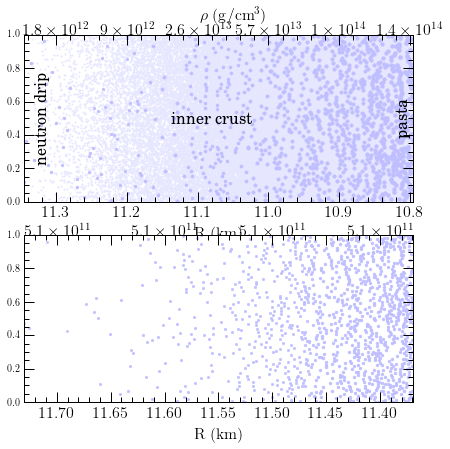

In [4]:
plot.rc('text',usetex=True)
plot.rc('font',family='serif')
plot.rcParams['lines.linewidth']=0.5
fig,(ax1,ax2)=plot.subplots(2,1,figsize=(6.0,6.0))
fig.subplots_adjust(wspace=0.2,left=0.08,right=0.98,
                                 bottom=0.12,top=0.97)
ax1.minorticks_on()
ax1.tick_params('both',length=10,width=1,which='major')
ax1.tick_params('both',length=5,width=1,which='minor')
ax2.minorticks_on()
ax2.tick_params('both',length=10,width=1,which='major')
ax2.tick_params('both',length=5,width=1,which='minor')

fig.set_facecolor('white')

ax1.set_xlim([numpy.max(r_nnuc),numpy.min(r_nnuc)])
ax1.plot(r_nn,w_nn,marker='o',lw=0,mfc=(0.9,0.9,1.0),
          mec=(0.9,0.9,1.0),mew=0.0,ms=2.0)
for i in range(0,len(r_nnuc)):
    ax1.plot(r_nnuc[i],w_nnuc[i],
              marker='.',lw=0,mfc=(0.75,0.75,1.0),mec=(0.75,0.75,1.0),
              ms=Rn_nnuc[i])
ax1.set_xlabel('$\mathrm{R~(km)}$',fontsize=16)
ax1.text(11.05,1.12,r'$\rho~(\mathrm{g}/\mathrm{cm}^3)$',fontsize=16,
          va='center',ha='center',
          bbox=dict(facecolor='white',lw=0))
ax1.text(10.8,1.03,latex_float(rho_108),fontsize=16,
          va='center',ha='center')
ax1.text(10.9,1.03,latex_float(rho_109),fontsize=16,
          va='center',ha='center')
ax1.text(11.0,1.03,latex_float(rho_110),fontsize=16,
          va='center',ha='center')
ax1.text(11.1,1.03,latex_float(rho_111),fontsize=16,
          va='center',ha='center')
ax1.text(11.2,1.03,latex_float(rho_112),fontsize=16,
          va='center',ha='center')
ax1.text(11.3,1.03,latex_float(rho_113),fontsize=16,
          va='center',ha='center')
ax1.text(10.81,0.5,'pasta',fontsize=16,
          rotation=90,va='center',ha='center')
ax1.text(11.32,0.5,'neutron drip',fontsize=16,
          rotation=90,va='center',ha='center')
ax1.text(11.08,0.5,'inner crust',fontsize=16,
          va='center',ha='center')
for label in ax1.get_xticklabels():
    label.set_fontsize(16)
    
ax2.set_xlim([numpy.max(r_nnuc_outer),numpy.min(r_nnuc_outer)])
for i in range(0,len(r_nnuc_outer)):
    ax2.plot(r_nnuc_outer[i],w_nnuc_outer[i],
              marker='.',lw=0,mfc=(0.75,0.75,1.0),mec=(0.75,0.75,1.0),
              ms=Rn_nnuc_outer[i])
ax2.set_xlabel('$\mathrm{R~(km)}$',fontsize=16)
for label in ax2.get_xticklabels():
    label.set_fontsize(16)
ax2.text(11.4,1.03,latex_float(rho_114),fontsize=16,
          va='center',ha='center')
ax2.text(11.5,1.03,latex_float(rho_115),fontsize=16,
          va='center',ha='center')
ax2.text(11.6,1.03,latex_float(rho_116),fontsize=16,
          va='center',ha='center')
ax2.text(11.7,1.03,latex_float(rho_117),fontsize=16,
          va='center',ha='center')

plot.show()